# Problem Set 5

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Define solvers
def newton_max(f, x0, arglist):
    xn = x0 ; fn = f(xn,arglist)
    grad = (f(xn+0.5*1e-5,arglist)-f(xn-0.5*1e-5,arglist))*1e+5
    secgrad1 = (f(xn+0.5*1e-5+0.5*1e-5,arglist)-f(xn-0.5*1e-5+0.5*1e-5,arglist))*1e+5
    secgrad2 = (f(xn+0.5*1e-5-0.5*1e-5,arglist)-f(xn-0.5*1e-5-0.5*1e-5,arglist))*1e+5
    secderiv = (secgrad1-secgrad2)*1e+5
    while (abs(grad)>1e-8):
        xn = xn - grad/secderiv
        fval = f(xn,arglist)
        grad = (f(xn+0.5*1e-5,arglist)-f(xn-0.5*1e-5,arglist))*1e+5
        secgrad1 = (f(xn+0.5*1e-5+0.5*1e-5,arglist)-f(xn-0.5*1e-5+0.5*1e-5,arglist))*1e+5
        secgrad2 = (f(xn+0.5*1e-5-0.5*1e-5,arglist)-f(xn-0.5*1e-5-0.5*1e-5,arglist))*1e+5
        secderiv = (secgrad1-secgrad2)*1e+5
    return xn

def newton_add(f, x0, arglist):
    current = x0 ; fval = f(current,arglist)
    grad = (f(current+0.5*1e-5,arglist)-f(current-0.5*1e-5,arglist))*1e+5
    while (abs(fval)>1e-8):
        current = current - fval/grad
        fval = f(current,arglist)
        grad = (f(current+0.5*1e-5,arglist)-f(current-0.5*1e-5,arglist))*1e+5        
    return current

### Problem 1

Assume that the consumer has a utility function over consumption today (period 1)
and the future (period 2). Choose $u(c_{1},c_{2}) = c_{1}^e + (1/1+q) * c_{2}^e$, where e is a
parameter between 0 and 1, say 0.5, and q is 0.04. <br>
The consumer has income in both periods, but can also save or borrow money. In particular, savings s is given by $I_{1}-c_{1}$, and consumption in period 2 is given by $I_2+s(1+r)$, where r is the interest rate.(s will be negative if the consumer borrows money.) <br>
We can put this into our numerical framework by substituting for s, giving a budget constraint $c_2= I_2+
(I_1-c_1)(1+r)$. Try to go through the same exercise as lecture 4 using this model,
assessing the effects of a change in the interest rate r.

In [3]:
def f(rs):
    for element in range(len(rs)):
        r = rs[element]
       
        def utility(c1, c2):
            e = 0.5 ; q = 0.04
            return np.power(c1,e)+(1/(1+q))*np.power(c2,e)
        
        def utility_budget(c1, ip_list):
            I1 = ip_list[0] ; I2 = ip_list[1] ; r = ip_list[2]
            c2 = I2 + (I1 - c1)*(1+r)
            return utility(c1, c2)
         
        def demand(I1, I2, r):
            c1 = newton_max(utility_budget, 0.1, [I1, I2, r])
            c2 = I2 + (I1 - c1)*(1+r)
            return c1, c2
        
        def indiff_dist(c2, mylist): 
            c1 = mylist[0] ; utility_level = mylist[1]
            utitility_achieved = utility(c1,c2)
            return utitility_achieved - utility_level

        def indifference(c1, util):
            return newton_add(indiff_dist, 1, [c1,util])

        def indirect_utility(I1, I2, r):
            c11, c22 = demand(I1, I2, r)
            return utility(c11, c22)

        # initialise quantiites of good 1 (x), income (I), and prices of the two goods
        c1 = np.linspace(1,30,100) ; I1 = 10 ; I2 = 12

        # get indirect utility curve here
        utility_level = indirect_utility(I1, I2, r)
        c2 = np.zeros(len(c1))

        for idx in range(len(c1)):
            c2[idx] = indifference(c1[idx], utility_level)


        #Compute the optimal demand for each r
        dem = []
        dem= demand(I1,I2,r)    

        # plot and make nice
        plt.figure(figsize = (6,4)) ; plt.plot(c1, c2, label = f'Indifference curve with r = {np.round(r,2)}')
        plt.plot(c1, I2 + (I1 - c1)*(1+r), color = 'red', label = 'budget line')
        plt.scatter(dem[0],dem[1], label = "Optimum demand", color ='black')
        plt.text(dem[0], dem[1], '({}, {})'.format(np.round(dem[0],2), np.round(dem[1],2)))
        plt.xlabel('quantity of goods consumed today') ; plt.ylabel('quantity of good s consumed tomorow')
        plt.legend(loc = 'upper right')
        plt.title('Evolution of indifference curves when interest rates varie')
        plt.xlim(0,30) ; plt.ylim(0,30)
        plt.show()

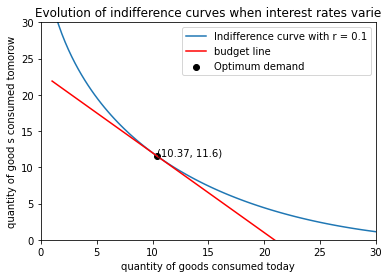

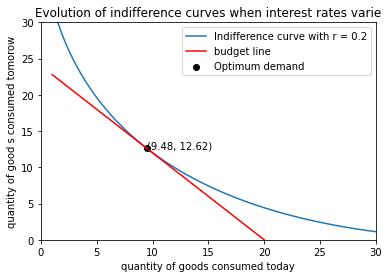

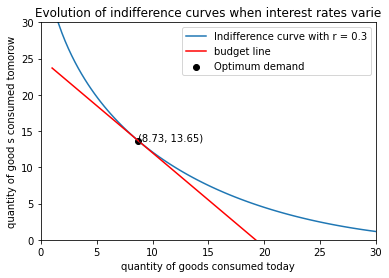

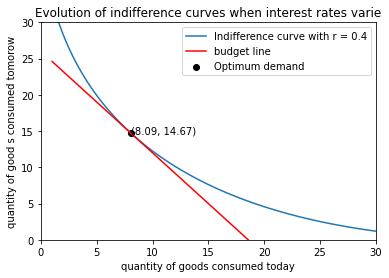

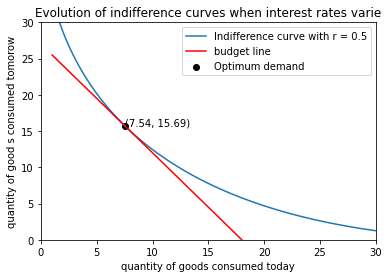

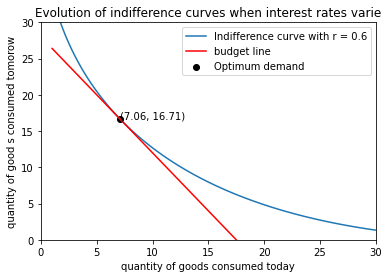

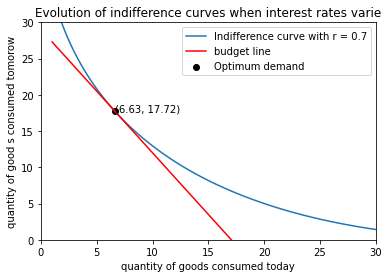

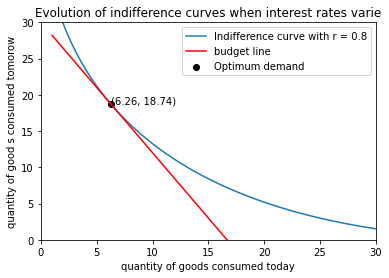

In [4]:
rs = np.arange(0.1,0.9,0.1)
f(rs)

Using the assumption in point b as a starting point, check how the income effects of
an increase in the interest rate depends on whether the consumer initially borrows or
saves money, which would then depend on I1 and I2.

#### <u> Case A: Saver Case <u>

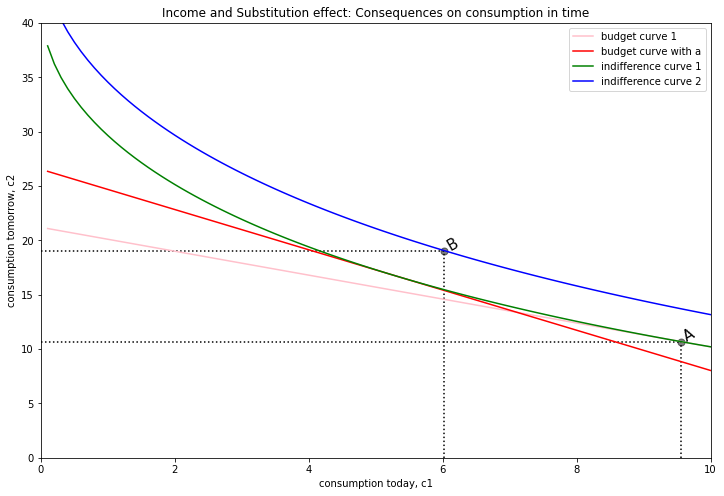

In [5]:
def utility(c1, c2):
    e = 0.5 ; q = 0.04
    return np.power(c1,e)+(1/(1+q))*np.power(c2,e)

def utility_budget(c1, ip_list):
    I1 = ip_list[0] ; I2 = ip_list[1] ; r = ip_list[2]
    c2 = I2 + (I1 - c1)*(1+r)
    return utility(c1, c2)
    
def demand(I1, I2, r):
    c1 = newton_max(utility_budget, 0.1, [I1, I2, r])
    c2 = I2 + (I1 - c1)*(1+r)
    return c1, c2

def indiff_dist(c2, mylist): 
    c1 = mylist[0] ; utility_level = mylist[1]
    utitility_achieved = utility(c1,c2)
    return utitility_achieved - utility_level

def indifference(c1, util):
    return newton_add(indiff_dist, 1, [c1,util])

def indirect_utility(I1, I2, r):
    c11, c22 = demand(I1, I2, r)
    return utility(c11, c22)

def diff_indirect_utilities(income_to_be_found,longlist):
    I1 = longlist[0] ; I2 = longlist[1] ; r1 = longlist[2] ; r2 = longlist[3]
    return indirect_utility(I1, I2, r1) - indirect_utility(I1,income_to_be_found,r2)

# define the parameters
I1 = 12 ; I2 = 8 ; r1 = 0.1 ; r2 = 0.85


# Give optimal income level for period 2 when prices change
a = newton_add(diff_indirect_utilities, 1, [I1, I2, r1, r2])
# print(a)

c1 = np.linspace(0.1, 10, 100) # quantity of good today

# plot with the new budget line as well
plt.figure(figsize = (12, 8))

# budget curve 1 : Before changes
plt.plot(c1, I2 + (I1 - c1)*(1+r1), color = 'pink', label = 'budget curve 1')

# budget curve2 : After changes
plt.plot(c1, a + (I1 - c1)*(1+r2), color = 'red', label = 'budget curve with a')

# get the utility levels
u_bar = indirect_utility(I1, I2, r1) 
u_bar2 = indirect_utility(I1, I2, r2)

#print(u_bar, u_bar2)

# express utility max as a function of quantity of good tomorrow
c21 = np.zeros((100,1)) ; c22 = np.zeros((100,1))

for idx in range(len(c1)):
    c21[idx] = indifference(c1[idx], u_bar)
    c22[idx] = indifference(c1[idx], u_bar2)

plt.plot(c1, c21, label = 'indifference curve 1', color = 'green') 
plt.plot(c1, c22, label = 'indifference curve 2', color = 'blue')

# find utility-maximising consumption bundle
dems1 = demand(I1, I2, r1) ; plt.scatter(dems1[0], dems1[1],s=50,alpha=0.5,color='black')
dems2 = demand(I1, I2, r2) ; plt.scatter(dems2[0], dems2[1],s=50,alpha=0.5,color='black')

# make nice
# plt.vlines(dems1[0], 8, 10.5, linestyles = 'dotted', color = 'k')
# plt.vlines(dems2[0], 8, 10.5, linestyles = 'dotted', color = 'k')
plt.annotate('A', xy = (dems1[0], dems1[1]), xycoords='data',rotation = 30, size=15)
plt.annotate('B', xy = (dems2[0], dems2[1]), xycoords='data',rotation = 30, size=15)

plt.vlines(dems1[0],0,dems1[1],linestyles='dotted')
plt.vlines(dems2[0],0,dems2[1],linestyles='dotted')
plt.hlines(dems1[1],0,dems1[0], linestyles='dotted')
plt.hlines(dems2[1],0,dems2[0], linestyles='dotted')
plt.ylim(0,40) ; plt.xlim(0,10)
plt.title('Income and Substitution effect: Consequences on consumption in time')
plt.xlabel('consumption today, c1') ; plt.ylabel('consumption tomorrow, c2')
plt.legend(loc = 'upper right') 

In [6]:
s = I1 - dems1[0]
print(f"In the case here we have a consumer with a higher income in the first period than in the second period. However the interest rate in the second period is higher {r2} than in the first period {r1}, therefore the customer is a saver, because we have {s} positive.")

In the case here we have a consumer with a higher income in the first period than in the second period. However the interest rate in the second period is higher 0.85 than in the first period 0.1, therefore the customer is a saver, because we have 2.444911153110837 positive.


#### <u> Case B: Borrower Case <u>

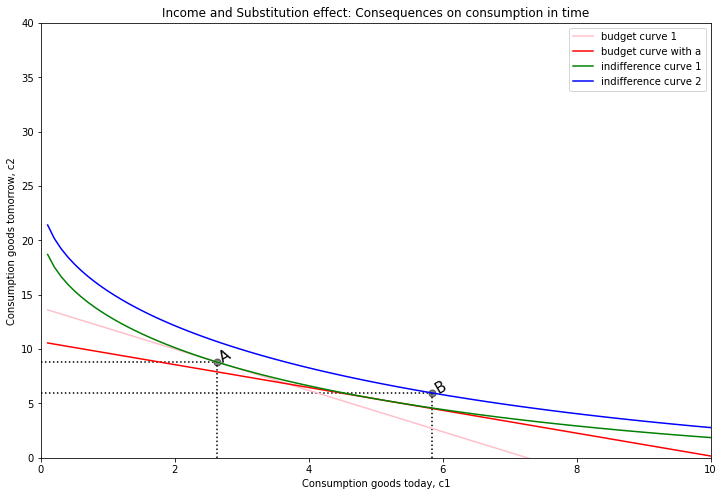

In [7]:
def utility(c1, c2):
    e = 0.5 ; q = 0.04
    return np.power(c1,e)+(1/(1+q))*np.power(c2,e)

def utility_budget(c1, ip_list):
    I1 = ip_list[0] ; I2 = ip_list[1] ; r = ip_list[2]
    c2 = I2 + (I1 - c1)*(1+r)
    return utility(c1, c2)
    
def demand(I1, I2, r):
    c1 = newton_max(utility_budget, 0.1, [I1, I2, r])
    c2 = I2 + (I1 - c1)*(1+r)
    return c1, c2

def indiff_dist(c2, mylist): 
    c1 = mylist[0] ; utility_level = mylist[1]
    utitility_achieved = utility(c1,c2)
    return utitility_achieved - utility_level

def indifference(c1, util):
    return newton_add(indiff_dist, 1, [c1,util])

def indirect_utility(I1, I2, r):
    c11, c22 = demand(I1, I2, r)
    return utility(c11, c22)

def diff_indirect_utilities(income_to_be_found,longlist):
    I1 = longlist[0] ; I2 = longlist[1] ; r1 = longlist[2] ; r2 = longlist[3]
    return indirect_utility(I1, I2, r1) - indirect_utility(I1,income_to_be_found,r2)

# define the things we need
I1 = 2 ; I2 = 10 ; r1 = 0.9 ; r2 = 0.05


'''So this should find the income level that would together with prices 1 and 1 (the last two arguments)
 would give the same utility as an income level of 10, together with prices 2 and 1'''
a = newton_add(diff_indirect_utilities, 1, [I1, I2, r1, r2])
# print(a)

c1 = np.linspace(0.1, 10, 100) # quantity of good 1

# plot with the new budget line as well
plt.figure(figsize = (12, 8))

# budget curve: price1 = 2, income = 10
plt.plot(c1, I2 + (I1 - c1)*(1+r1), color = 'pink', label = 'budget curve 1')

# budget curve: price1 = 1, income = a (gives the same utility as income of 10)
plt.plot(c1, a + (I1 - c1)*(1+r2), color = 'red', label = 'budget curve with a')

# get the utility levels
u_bar = indirect_utility(I1, I2, r1) 
u_bar2 = indirect_utility(I1, I2, r2)

#print(u_bar, u_bar2)

# express utility max as a function of quantity of good 2
c21 = np.zeros((100,1)) ; c22 = np.zeros((100,1))

for idx in range(len(c1)):
    c21[idx] = indifference(c1[idx], u_bar)
    c22[idx] = indifference(c1[idx], u_bar2)

plt.plot(c1, c21, label = 'indifference curve 1', color = 'green') 
plt.plot(c1, c22, label = 'indifference curve 2', color = 'blue')

# find utility-maximising consumption bundle
dems1 = demand(I1, I2, r1) ; plt.scatter(dems1[0], dems1[1],s=50,alpha=0.5,color='black')
dems2 = demand(I1, I2, r2) ; plt.scatter(dems2[0], dems2[1],s=50,alpha=0.5,color='black')

# make nice
# plt.vlines(dems1[0], 8, 10.5, linestyles = 'dotted', color = 'k')
# plt.vlines(dems2[0], 8, 10.5, linestyles = 'dotted', color = 'k')
plt.annotate('A', xy = (dems1[0], dems1[1]), xycoords='data',rotation = 30, size=15)
plt.annotate('B', xy = (dems2[0], dems2[1]), xycoords='data',rotation = 30, size=15)

plt.vlines(dems1[0],0,dems1[1],linestyles='dotted')
plt.vlines(dems2[0],0,dems2[1],linestyles='dotted')
plt.hlines(dems1[1],0,dems1[0], linestyles='dotted')
plt.hlines(dems2[1],0,dems2[0], linestyles='dotted')
plt.ylim(0,40) ; plt.xlim(0,10)
plt.title('Income and Substitution effect: Consequences on consumption in time')
plt.xlabel('Consumption goods today, c1') ; plt.ylabel('Consumption goods tomorrow, c2')
plt.legend(loc = 'upper right') 

In [8]:
s = I1 - dems1[0]
print(f"In the case here the interest rate in the second period is smaller {r2} than in the first period {r1}, therefore the customer is a borrower, because we have {s} negative savings.")

In the case here the interest rate in the second period is smaller 0.05 than in the first period 0.9, therefore the customer is a borrower, because we have -0.63477045211551 negative savings.


Set up a model with 100 such consumers. Let all of them have second period income
equal to 1, but let first period incomes be distributed uniformly on the interval from 0
to 2. Plot the change in period 1 consumption (as a proxy for welfare) before and
after an interest rate increase against period 1 income.

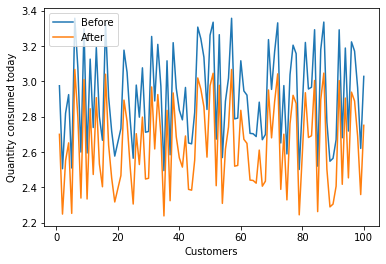

In [9]:

#do for i in in I1 = I1[i] 
def utility(c1, c2):
    e = 0.5 ; q = 0.04
    return np.power(c1,e)+(1/(1+q))*np.power(c2,e)

def utility_budget(c1, ip_list):
    I1 = ip_list[0] ; I2 = ip_list[1] ; r = ip_list[2]
    c2 = I2 + (I1 - c1)*(1+r)
    return utility(c1, c2)
    
def demand(I1, I2, r):
    c1 = newton_max(utility_budget, 0.1, [I1, I2, r])
    c2 = I2 + (I1 - c1)*(1+r)
    return c1, c2

def indiff_dist(c2, mylist): 
    c1 = mylist[0] ; utility_level = mylist[1]
    utitility_achieved = utility(c1,c2)
    return utitility_achieved - utility_level

def indifference(c1, util):
    return newton_add(indiff_dist, 1, [c1,util])

def indirect_utility(I1, I2, r):
    c11, c22 = demand(I1, I2, r)
    return utility(c11, c22)

def diff_indirect_utilities(income_to_be_found,longlist):
    I1 = longlist[0] ; I2 = longlist[1] ; r1 = longlist[2] ; r2 = longlist[3]
    return indirect_utility(I1, I2, r1) - indirect_utility(I1,income_to_be_found,r2)

# define the things we need
n = 100 ; In1 = np.random.uniform(0,2,n) ; I2 = 8 ; r1 = 0.4 ; r2 = 0.5
before = [] ; after = [] 

for i in range(n):
    I1 = In1[i]

    demo1, demo2 = demand(I1,I2,r1)
    before.append(demo1)

    demo1, demo2 = demand(I1,I2,r2)
    after.append(demo1)

c1 = np.linspace(1,100,100)   
plt.plot(c1,before, label = "Before")
plt.plot(c1,after, label = "After")
plt.xlabel("Customers") ; plt.ylabel("Quantity consumed today")
plt.legend()


<ipython-input-9-eb3b83f5e694>:4: RuntimeWarning: invalid value encountered in power
  return np.power(c1,e)+(1/(1+q))*np.power(c2,e)


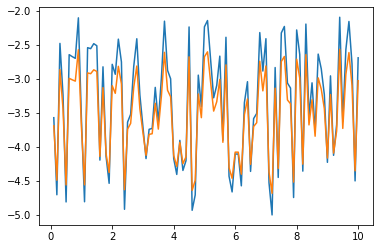

In [10]:
# define the things we need
n = 100 ; In1 = np.random.uniform(0,2,n) ; I2 = 1 ; r1 = 0.9 ; r2 = 0.05
before = [] ; after = []

for i in range(n):
    I1 = In1[i]
    a = newton_add(diff_indirect_utilities, 1, [I1, I2, r1, r2]) #Income level

    c1 = np.linspace(0.1, 10, 100) # quantity of good today


    # get the utility levels
    u_bar = indirect_utility(I1, I2, r1) 
    u_bar2 = indirect_utility(I1, I2, r2)

    # express utility max as a function of quantity of good 2
    c21 = np.zeros((100,1)) ; c22 = np.zeros((100,1))

    for idx in range(len(c1)):
        c21[idx] = indifference(c1[idx], u_bar)
        c22[idx] = indifference(c1[idx], u_bar2)
    before.append(c21[idx]) 
    after.append(c22[idx])

plt.plot(c1,before)
plt.plot(c1,after)

Before interest rate is not high so people don't have the incentive to save money for period 2 so they consume more in period 1.

### Problem 2

In [22]:
def shotgun_maximizer(funcname,startvalue,arglist):
    # startvalue will here be a list of three numbers
    xs = np.linspace(startvalue[0],startvalue[1],startvalue[2])
    ys = funcname(xs,arglist)
    ind = np.argmax(ys) #Return the indice where the maximum value of the function is found
    return xs[ind]

def shotgun_maximizer2(funcname,startvalue,arglist):
    # startvalue will here be a list of three numbers
    xs = np.linspace(startvalue[0],startvalue[1],startvalue[2])
    ys = np.zeros_like(xs)
    for i in range(startvalue[2]):
        ys[i]= funcname(xs[i],arglist)
    ind = np.argmax(ys)
    return xs[ind]

def BigK(labor,capital):
    return labor**0.6*capital**0.4

def profit(labor,mylist):
    p=mylist[0]
    w=mylist[1]
    C=mylist[2]
    fval = p*BigK(labor,10)-w*labor - C
    return fval

def supply(mylist,starting_value):
    labor = shotgun_maximizer(profit,[0.1,100,1000],mylist)
    labor = newton_max(profit,labor,mylist)
    return BigK(labor,10), labor

def f_inv(output):
    return output**(5/3)*10**(-2/3)

def profit2(output, mylist):
    p=mylist[0]
    w=mylist[1]
    C=mylist[2]
    return p*output-w*f_inv(output) - C

def supply2(mylist,starting_value):
    output = shotgun_maximizer(profit2,[0.1,100,1000],mylist)
    output = newton_max(profit2,output,mylist)
    labor = f_inv(output)
    return output, labor    

def profit_monopolist(output, mylist):
    p=10*output**(-0.5)
    w=mylist[0]
    C=mylist[1]
    return p*output-w*f_inv(output) - C

def supply_monopolist(mylist,starting_value):
    output = shotgun_maximizer(profit_monopolist,[0.1,100,100],mylist)
    output = newton_max(profit_monopolist,output,mylist)
    labor = f_inv(output)
    price=10*output**(-0.5)
    return output, labor, price    

We will study a monopolist’s behavior under linear demand. Let the production technology be as in Session 5. Let demand be given by $x = 10 - 2p$. Figure out the monopolist’s price setting.

Text(0.5, 1.0, 'Monopolist pricing compared with competetive pricing')

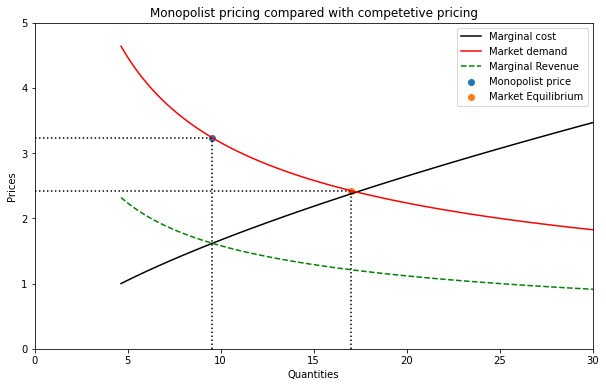

In [60]:
# Production Technology is defined under BigK, we need a fixed value for capital 
FCK = 10 ; w = 1
prices = np.linspace(1,5,100)
quantities = np.zeros(100)
startv=1
for i in range(100):
    quantities[i],startv=supply([prices[i],w,FCK],startv)

#Return the output, labour, prices and profit for the monopoly
mo, ml, mp = supply_monopolist([1,0],0.0001)
mpi = profit_monopolist(20,[6,5,1])

p = lambda q: 10*np.power(q,-0.5)

#Create Figure
plt.figure(figsize = (10, 6))

#Plot the curves
plt.plot(quantities,prices,"-k",label="Marginal cost") 
plt.plot(quantities,p(quantities),"-r",label="Market demand")
plt.plot(quantities,p(quantities)+quantities*10*(-0.5)*quantities**(-1.5),"--g",label="Marginal Revenue")

#Plot the Monopolist equilibrium and price
plt.vlines(mo,0,10*np.power(mo,-0.5),linestyles='dotted')
plt.hlines(10*np.power(mo,-0.5),0,mo,linestyles='dotted')
plt.scatter(mo,p(mo), label = "Monopolist price")

#Compute and Plot the Market equilibirum 
idx = np.argwhere(np.diff(np.sign(prices - p(quantities)))).flatten() #Find the idex when the derivate is equal to zero (np.sign gives zero if difference is close to zero)
#print(quantities[idx]) ; print(prices[idx]) ; print(p(quantities[idx]))
plt.vlines(quantities[idx],0,p(quantities[idx]),linestyles='dotted')
plt.hlines(p(quantities[idx]),0,quantities[idx],linestyles='dotted')
plt.scatter(quantities[idx],p(quantities[idx]), label = "Market Equilibrium")

#Graph Parameters
plt.legend(loc="upper right")
plt.ylim(0, 5) ; plt.ylabel("Prices")
plt.xlim(0,30) ; plt.xlabel("Quantities")
plt.title("Monopolist pricing compared with competetive pricing")


Study a market with ten pricetaking firms, each with the same technology as in Session 5. The firms have capital stocks 1,2,3,4,5,6,7,8,9 and 10. Figure out the market supply curve, find the market equilibrium if the demand is given as in Problem 2a, and plot the production versus the capital stocks.

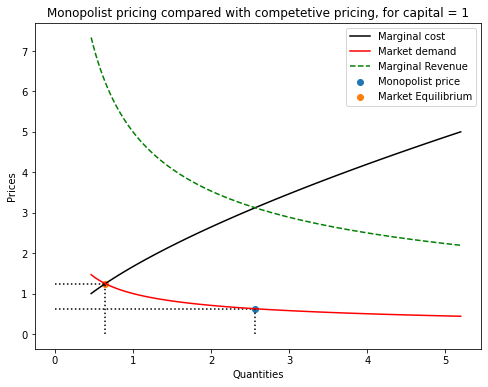

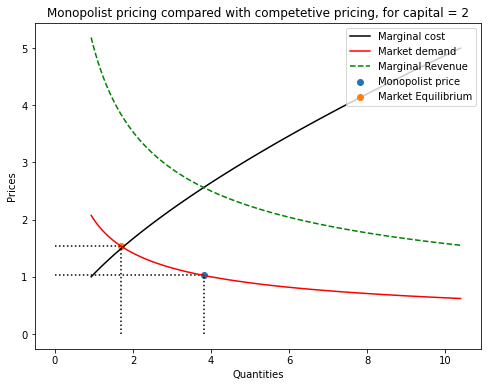

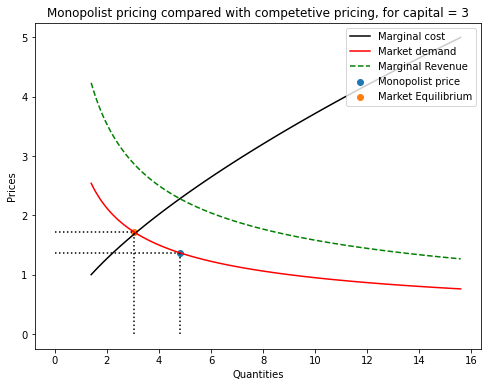

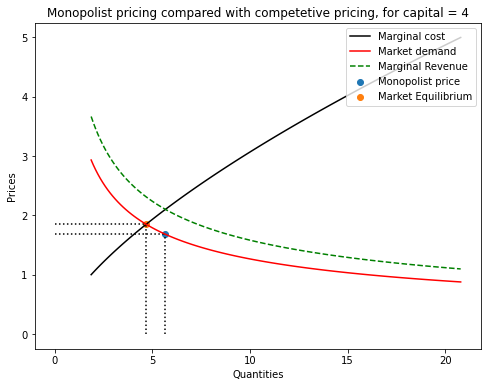

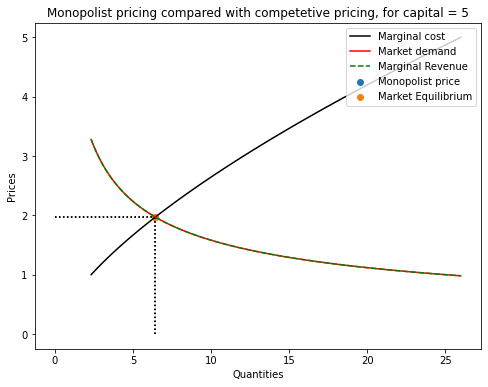

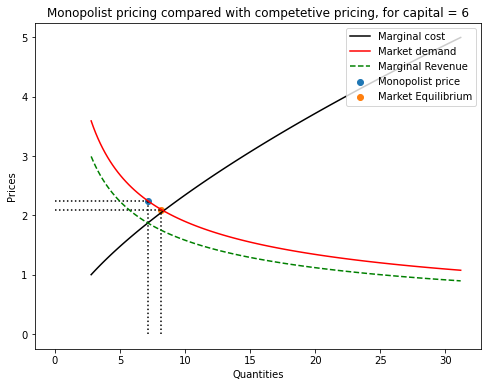

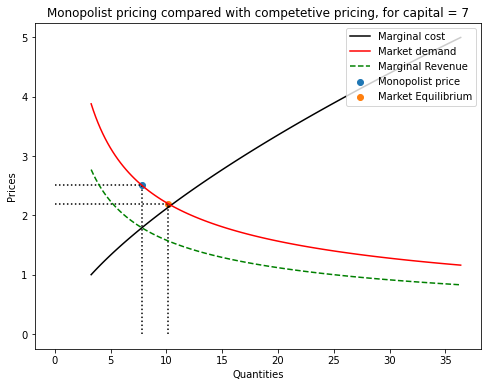

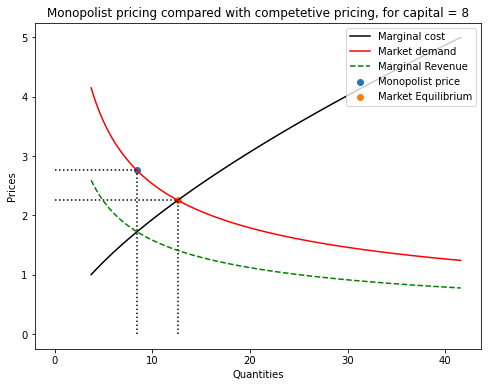

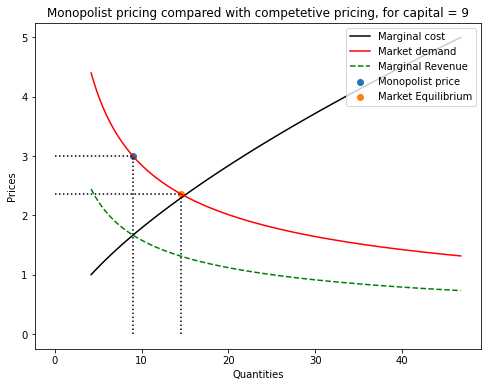

In [71]:
KS = np.arange(1,10,1)

for i in range(len(KS)):
    capital = KS[i]
    def BigK(labor,capital):
        alpha = 0.6
        return np.power(labor,alpha)*np.power(capital,1-alpha)

    def profit(labor,mylist):
        p=mylist[0] ; w=mylist[1]; FCK=mylist[2]
        fval = p*BigK(labor,capital)-w*labor - FCK
        return fval

    def supply(mylist,starting_value):
        labor = shotgun_maximizer(profit,[0.1,100,1000],mylist)
        labor = newton_max(profit,labor,mylist)
        return BigK(labor,capital), labor

    def f_inv(output):
        return output**(5/3)*capital**(-2/3)

    def profit2(output, mylist):
        p=mylist[0] ; w=mylist[1] ; FCK=mylist[2]
        return p*output-w*f_inv(output) - FCK

    def supply2(mylist,starting_value):
        output = shotgun_maximizer(profit2,[0.1,100,1000],mylist)
        output = newton_max(profit2,output,mylist)
        labor = f_inv(output)
        return output, labor    

    def profit_monopolist(output, mylist):
        p=10*output**(-0.5) ; w=mylist[1] ; FCK=mylist[2]
        return p*output-w*f_inv(output) - FCK

    def supply_monopolist(mylist,starting_value):
        output = shotgun_maximizer(profit_monopolist,[0.1,100,100],mylist)
        output = newton_max(profit_monopolist,output,mylist)
        labor = f_inv(output)
        price=10*output**(-0.5)
        return output, labor, price

    # Production Technology is defined under BigK, we need a fixed value for capital 
    FCK = 10 ; w = 1 ; prices = np.linspace(1,5,100) ; quantities = np.zeros(100) ; startv=1
    for i in range(100):
        quantities[i],startv=supply([prices[i],w,capital],startv)

    #Return the output, labour, prices and profit for the monopoly
    outputs = np.linspace(1, 10, 100) ; p = 6 ; w = 5 ; FC = 1
    mo, ml, mp = supply_monopolist([p,FC,capital],1)
    #mpi = profit_monopolist(20,[6,5,1])

    p = lambda q: capital*np.power(q,-0.5)

    #Create Figure
    plt.figure(figsize = (8, 6))

    #Plot the curves
    plt.plot(quantities,prices,"-k",label="Marginal cost") 
    plt.plot(quantities,p(quantities),"-r",label="Market demand")
    plt.plot(quantities,10*quantities**(-0.5) + quantities*10*(-0.5)*quantities**(-1.5),"--g",label="Marginal Revenue")

    #Plot the Monopolist equilibrium and price
    plt.vlines(mo,0,p(mo),linestyles='dotted')
    plt.hlines(p(mo),0,mo,linestyles='dotted')
    plt.scatter(mo,p(mo), label = "Monopolist price")

    #Compute and Plot the Market equilibirum 
    idx = np.argwhere(np.diff(np.sign(prices - p(quantities)))).flatten() #Find the idex when the derivate is equal to zero (np.sign gives zero if difference is close to zero)
    #print(quantities[idx]) ; print(prices[idx]) ; print(p(quantities[idx]))
    plt.vlines(quantities[idx],0,p(quantities[idx]),linestyles='dotted')
    plt.hlines(p(quantities[idx]),0,quantities[idx],linestyles='dotted')
    plt.scatter(quantities[idx],p(quantities[idx]), label = "Market Equilibrium")

    #Graph Parameters
    plt.legend(loc="upper right")
    plt.ylabel("Prices")
    plt.xlabel("Quantities")
    plt.title(f"Monopolist pricing compared with competetive pricing, for capital = {capital}")

[Hard] A monopsonist. Think about a firm that sells its goods on the world market(and can not affect the price) but has production facilities that are large relative to theplace where it is located. Assume that the firm faces an increasing supply curve oflabor. For simplicity, let l (labor)= 1 + 0.1 w. Using the same techniques as in session5, figure out the monopsonist’s choice of produced quantities.